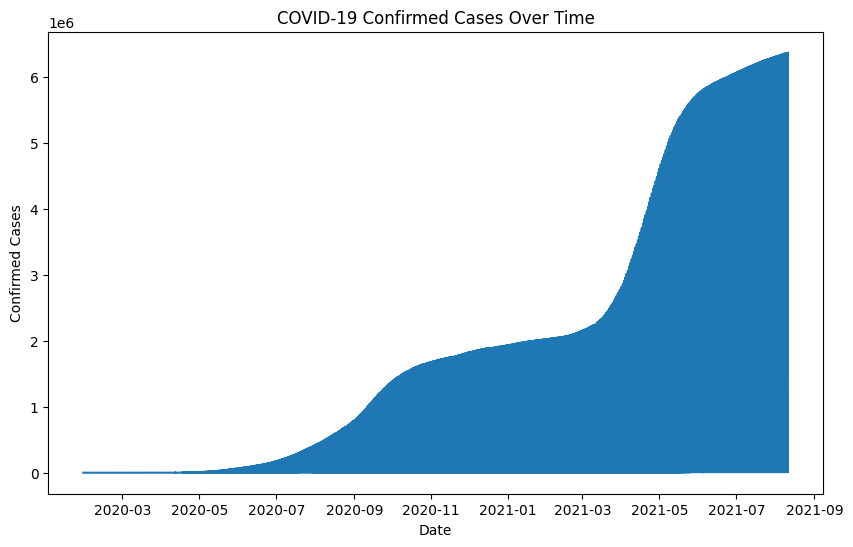

C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                18110
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -266610.649
Date:                Wed, 05 Jun 2024   AIC                         533227.299
Time:                        01:15:03   BIC                         533250.711
Sample:                             0   HQIC                        533234.996
                              - 18110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0651      0.008     -8.270      0.000      -0.081      -0.050
ma.L1         -0.9966      0.001  -1944.029      0.000      -0.998      -0.996
sigma2      4.399e+11   1.26e-15    3.5e+26      0.0

C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


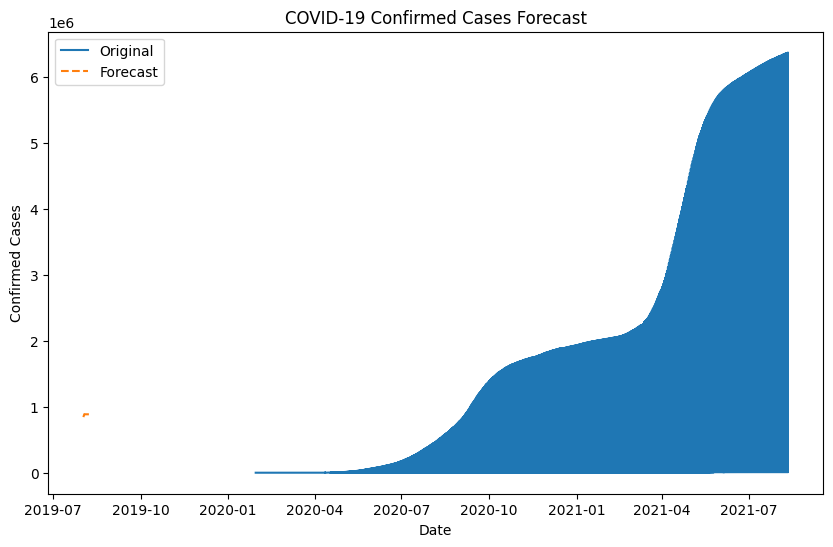

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('covid_19_india.csv')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the date as the index
data.set_index('Date', inplace=True)

# Select the column to model (e.g., 'Confirmed')
time_series = data['Confirmed']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Fit the ARIMA model (p, d, q) - let's start with (1, 1, 1)
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)

# Print the forecasted values
print(forecast)

# Plot the forecasted values along with the original time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('COVID-19 Confirmed Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()
